In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

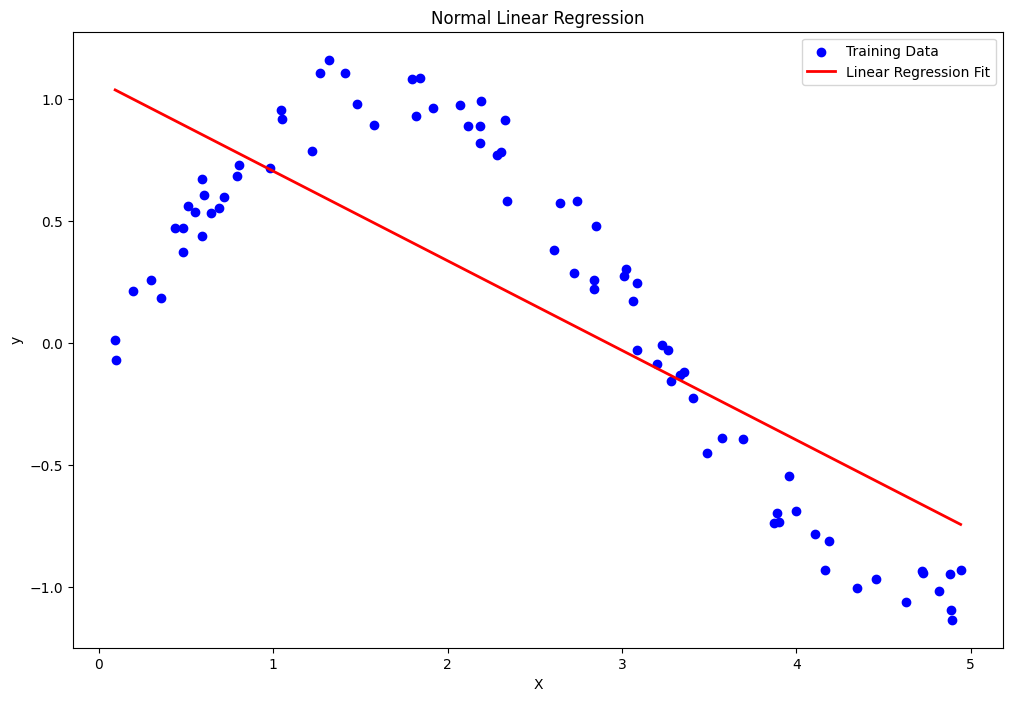

Intercept: 1.0698929836292679
Coefficient: -0.3668126609850612


In [2]:
def normal_equation_linear_regression(X, y):
    m = X.shape[0]

    X_augmented = np.hstack([np.ones((m, 1)), X])

    XTX = np.dot(X_augmented.T, X_augmented)
    XTX_inv = np.linalg.pinv(XTX)
    theta = np.dot(XTX_inv, np.dot(X_augmented.T, y))

    return theta


theta = normal_equation_linear_regression(X, y)


def predict(X, theta):
    m = X.shape[0]
    X_augmented = np.hstack([np.ones((m, 1)), X])
    y_pred = np.dot(X_augmented, theta)
    return y_pred


y_pred = predict(X, theta)

plt.figure(figsize=(12, 8))
plt.scatter(X, y, label="Training Data", color="blue")
plt.plot(X, y_pred, color="red", linewidth=2, label="Linear Regression Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Normal Linear Regression")
plt.legend()
plt.show()

print(f"Intercept: {theta[0]}")
print(f"Coefficient: {theta[1]}")

In [3]:
def lwlr(X, y, x_query, tau):
    m = X.shape[0]
    W = np.exp(-np.sum((X - x_query) ** 2, axis=1) / (2 * tau**2))
    W = np.diag(W)

    X_augmented = np.hstack([np.ones((m, 1)), X])
    x_query_augmented = np.array([1, x_query.item()]).reshape(1, 2)

    XTWX = np.dot(np.dot(X_augmented.T, W), X_augmented)
    XTWy = np.dot(np.dot(X_augmented.T, W), y)
    theta = np.linalg.solve(XTWX, XTWy)

    y_query = np.dot(x_query_augmented, theta)
    return y_query


def predict_lwlr(X, y, X_query, tau):
    y_pred = np.array([lwlr(X, y, x_query, tau) for x_query in X_query])
    return y_pred

In [4]:
X_query = np.linspace(0, 5, 100).reshape(-1, 1)
taus = [0.1, 0.3, 0.8, 2.0]

predictions = {}
for tau in taus:
    predictions[tau] = predict_lwlr(X, y, X_query, tau)

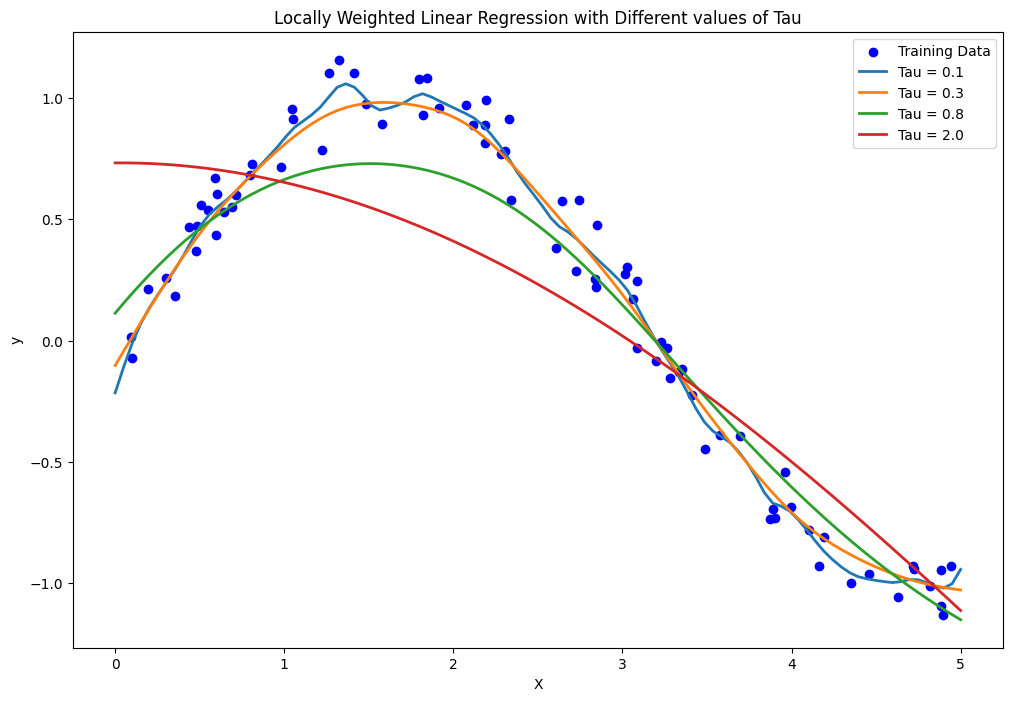

In [5]:
plt.figure(figsize=(12, 8))

plt.scatter(X, y, label="Training Data", color="blue")

for tau in taus:
    plt.plot(X_query, predictions[tau], linewidth=2, label=f"Tau = {tau}")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Locally Weighted Linear Regression with Different values of Tau")
plt.legend()
plt.show()